In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("ecommerce_sales.csv")

# Ver primeiras linhas
df.head()


,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35


In [12]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sale_id              2510 non-null   object 
 1   marketing_spend      2313 non-null   float64
 2   website_traffic      2356 non-null   float64
 3   conversion_rate      2316 non-null   float64
 4   avg_product_rating   2371 non-null   float64
 5   discount_percentage  2510 non-null   int64  
 6   num_products         2510 non-null   int64  
 7   avg_price            2510 non-null   float64
 8   customer_reviews     2263 non-null   float64
 9   return_rate          2284 non-null   float64
 10  product_category     2510 non-null   object 
 11  competition_level    2510 non-null   object 
 12  seasonality          2510 non-null   object 
 13  free_shipping        2510 non-null   object 
 14  payment_methods      2510 non-null   object 
 15  mobile_traffic_pct   2510 non-null   f

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sale_id,2510,2510,SALE00022,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketing_spend,2313.0,NaN,NaN,NaN,5502.807683,5969.862731,-631.01,3589.0,4969.55,6386.07,79343.5
website_traffic,2356.0,NaN,NaN,NaN,16004.24236,11857.502842,579.0,11716.75,15235.0,18689.75,191152.0
conversion_rate,2316.0,NaN,NaN,NaN,5.656852,1.674376,2.36,4.87,5.605,6.33,29.28
avg_product_rating,2371.0,NaN,NaN,NaN,2.963598,0.519186,1.27,2.63,2.97,3.31,6.5
discount_percentage,2510.0,NaN,NaN,NaN,13.570916,7.419097,0.0,10.0,10.0,15.0,70.0
num_products,2510.0,NaN,NaN,NaN,256.639044,142.989486,10.0,135.0,256.0,381.0,500.0
avg_price,2510.0,NaN,NaN,NaN,147.908295,75.601964,0.02,90.1,146.45,197.9625,472.8
customer_reviews,2263.0,NaN,NaN,NaN,503.790985,286.175109,1.0,263.5,505.0,744.5,999.0
return_rate,2284.0,NaN,NaN,NaN,9.104133,3.489621,3.99,7.9075,8.945,9.9025,59.89


In [13]:
df.isna().sum().sort_values(ascending=False)
df.duplicated().sum()


np.int64(0)

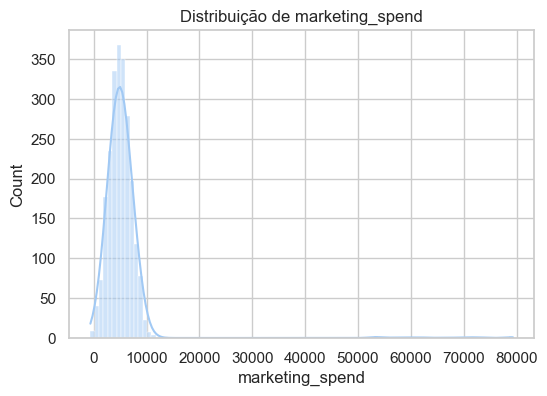

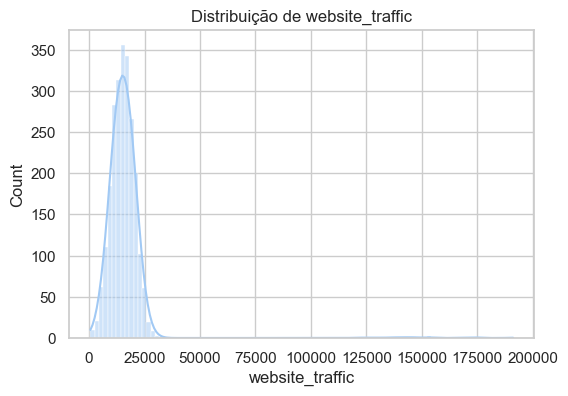

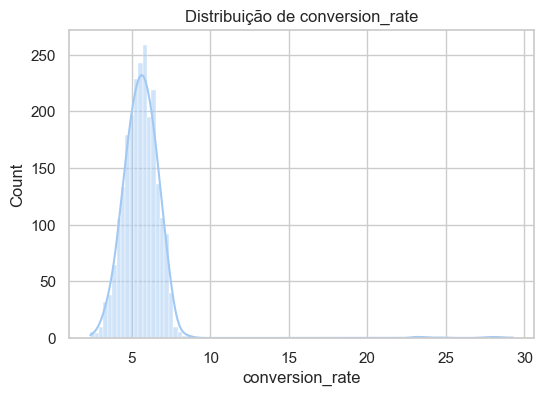

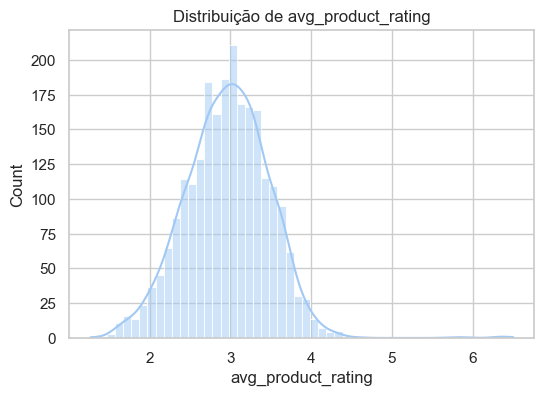

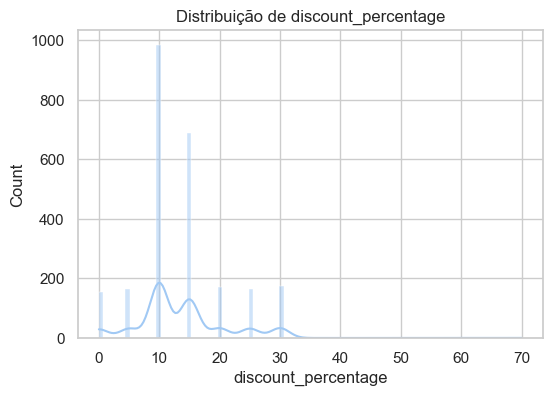

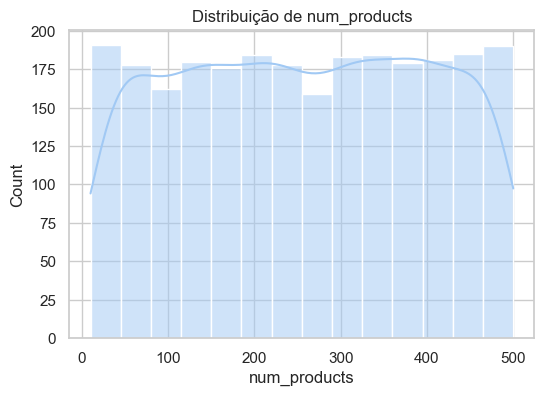

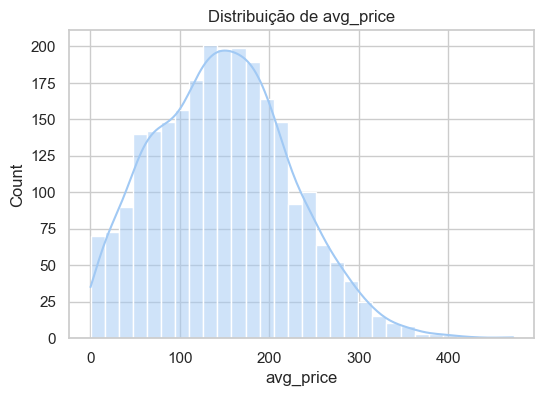

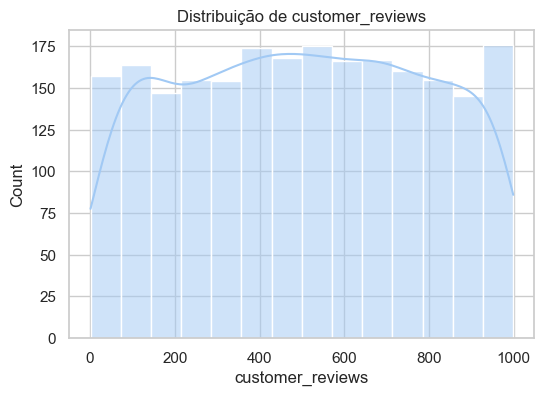

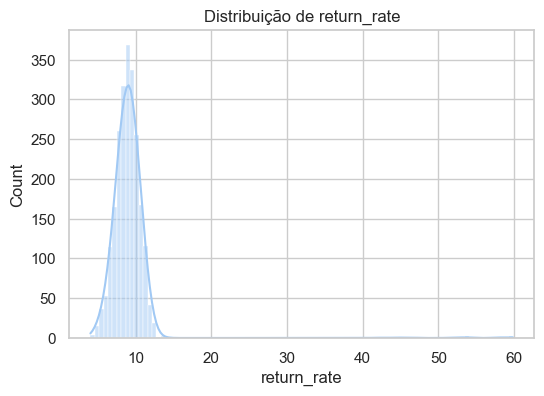

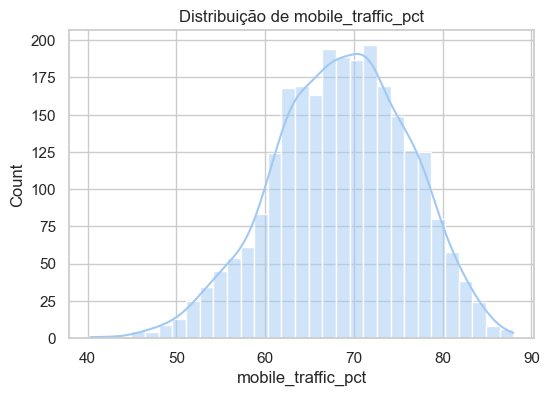

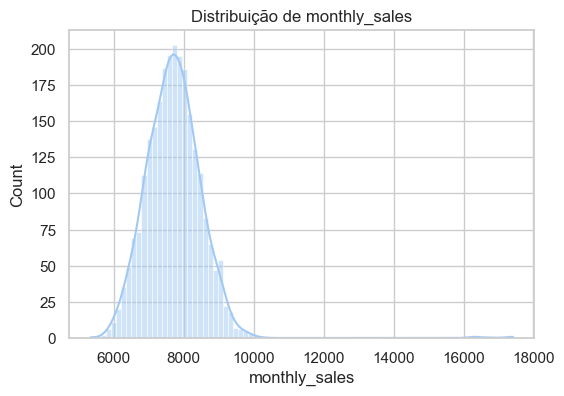

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()


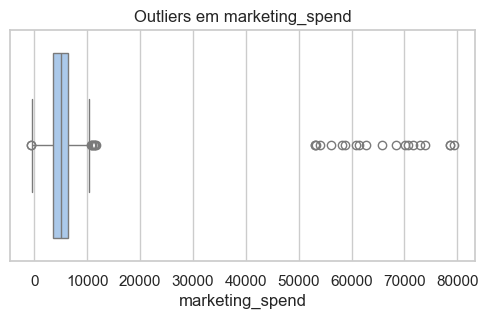

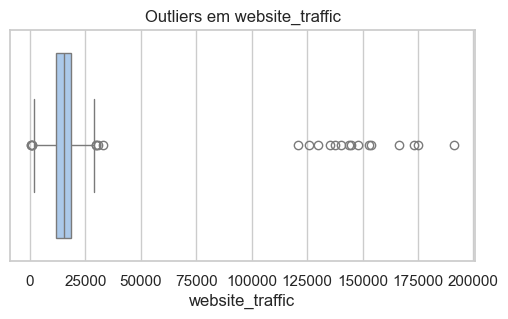

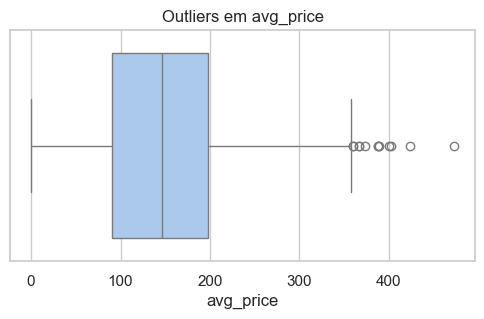

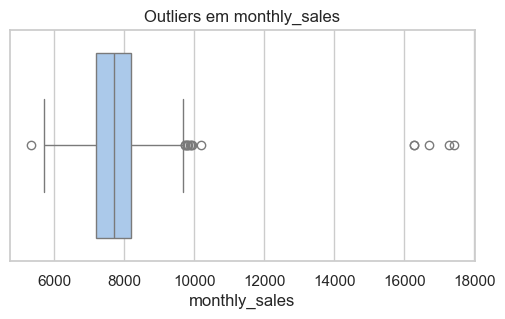

In [15]:
for col in ['marketing_spend', 'website_traffic', 'avg_price', 'monthly_sales']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers em {col}")
    plt.show()


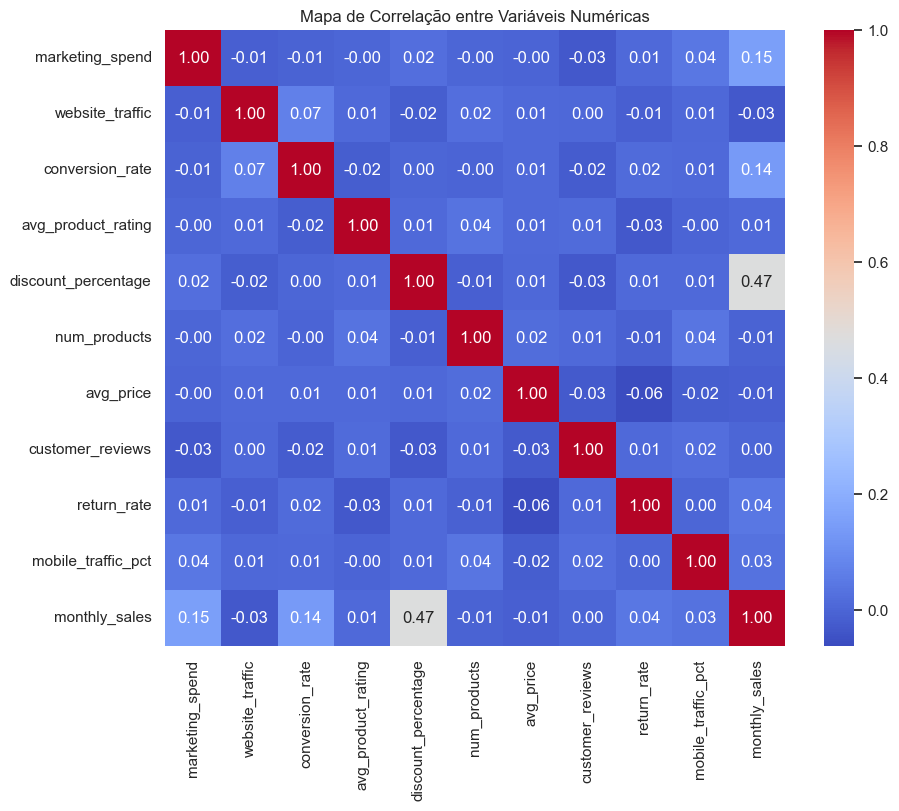

In [16]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


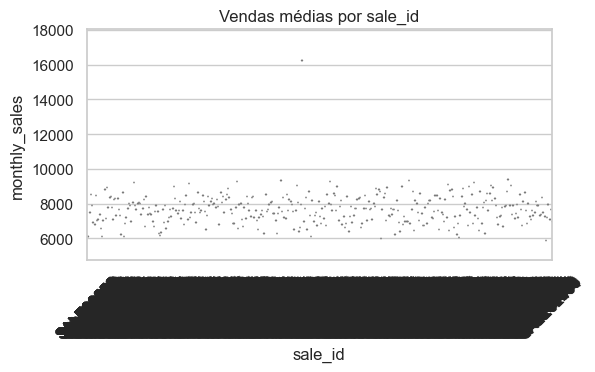

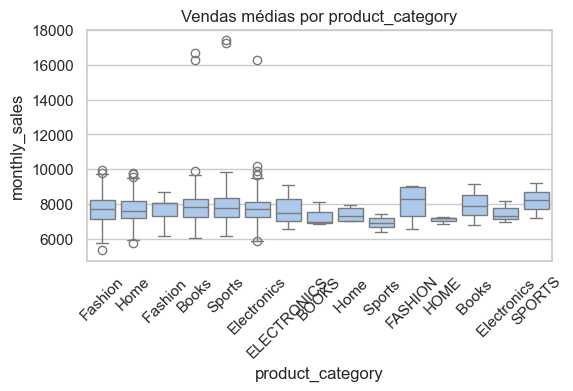

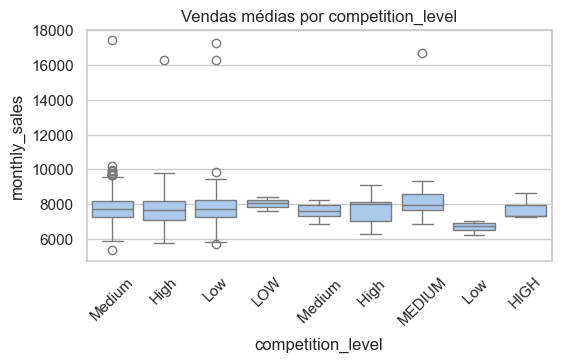

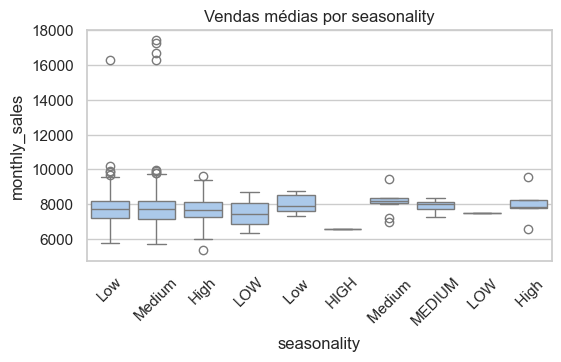

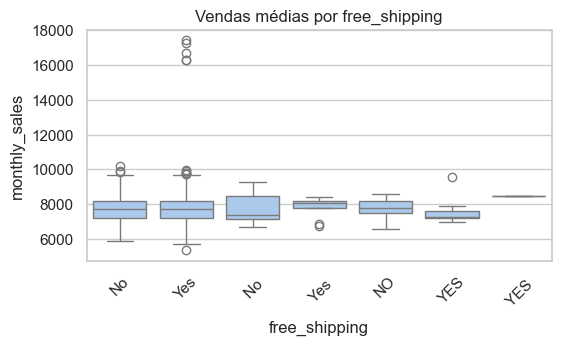

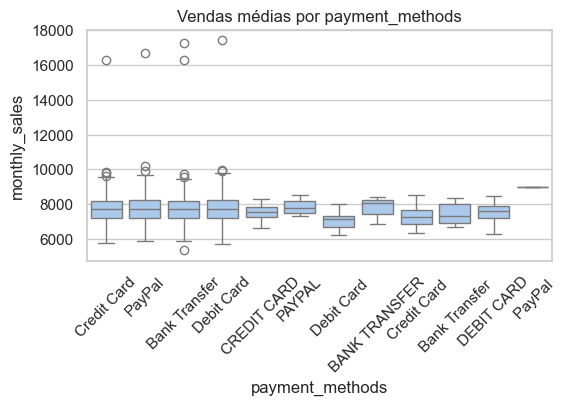

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=col, y='monthly_sales', data=df)
    plt.title(f"Vendas médias por {col}")
    plt.xticks(rotation=45)
    plt.show()


### 🔍 Conclusões da Etapa 1 (EDA)

- `marketing_spend`, `website_traffic` e `conversion_rate` estão fortemente ligados a `monthly_sales`.
- Algumas variáveis têm outliers (ex.: `avg_price`, `return_rate`).
- `free_shipping` parece aumentar as vendas médias.
- `product_category` e `seasonality` mostram padrões de variação importantes.
- Próximos passos: tratar valores ausentes e outliers na Etapa 2.


In [1]:
import pandas as pd

# Lê novamente o dataset original
df = pd.read_csv("ecommerce_sales.csv")

# (opcional) faz qualquer filtro ou seleção se quiser guardar só algumas colunas

# Salva o dataset 'explorado' (snapshot atual)
df.to_csv("dataset_explorado.csv", index=False)

print("Dataset explorado salvo com sucesso!")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\User\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_loop.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\User\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_loop.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\User\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_loop.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\User\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_loop.start()
  File "c:\Users\User\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found

Dataset explorado salvo com sucesso!
